In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import math

from bokeh.io import show, output_file, output_notebook, curdoc
from bokeh.models import ColumnDataSource, FactorRange, LabelSet, CustomJS
from bokeh.models.widgets import RangeSlider, Button, DataTable, TableColumn, NumberFormatter
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import inferno, Spectral6
from bokeh.layouts import row, widgetbox

#output_notebook()

In [7]:
df = pd.read_csv("CSV/disasters.csv")
df_sumed = df.groupby(['year']).sum()
#print(df)

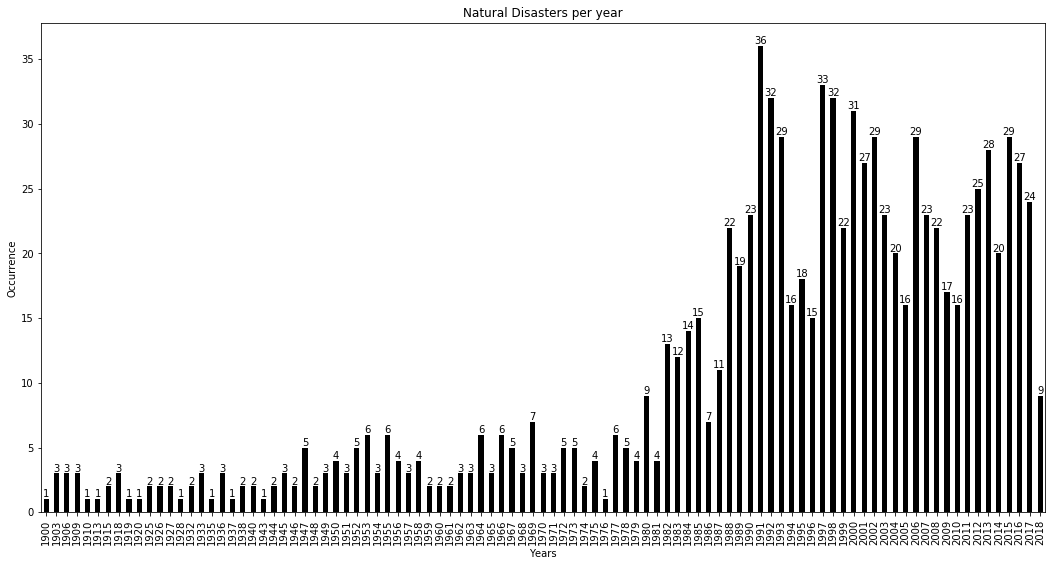

In [8]:
# Graph of Natural Disasters per year
result = list(zip(df_sumed.index, df_sumed.occurrence))

x_labels = [val[0] for val in result]
y_labels = [val[1] for val in result]
plt.figure(figsize=(18, 9))

ax = pd.Series(y_labels).plot(kind='bar', color="Black")
ax.set_xticklabels(x_labels)
ax.set_title("Natural Disasters per year")
ax.set_xlabel("Years")
ax.set_ylabel("Occurrence")

for rect in ax.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')


#plt.show()

In [9]:
output_file("templates/bar_colors.html")
result = list(zip(df_sumed.index, df_sumed.occurrence))

years = list([str(val[0]) for val in result])
occurrences = list([val[1] for val in result])

source = ColumnDataSource(data=dict(years=years, occurrences=occurrences, color=inferno(97)))

p = figure(x_range=years, y_range=(0,40), plot_height=500, plot_width=1000, title="Natural Disasters",
           toolbar_location=None, tools="")

p.vbar(x='years', top='occurrences', width=0.5, color='color', source=source)
p.xaxis.major_label_orientation = math.pi/2

label = LabelSet(x='years', y='occurrences', text='occurrences', level='glyph', text_font_size='0.8em', text_align='center', source=source, render_mode='canvas')

p.xgrid.grid_line_color = None
p.add_layout(label)
show(p)

In [10]:
source = ColumnDataSource(data=dict())

def update():
    current = df[(df['year'] >= slider.value[0]) & (df['year'] <= slider.value[1])].dropna()
    source.data = {
        'year'                    : current.year,
        'disaster_type'           : current.disaster_type,
        'occurrences'             : current.occurrence,
        'Injured'                 : current.Injured,
        'Total_deaths'            : current.Total_deaths,
        'Total_damage'            : current["Total_damage ('000 US$)"]
    }

slider = RangeSlider(title="Year", start=1900, end=2020, value=(0, 2300), step=1, format="0,0")
slider.on_change('value', lambda attr, old, new: update())

columns = [
    TableColumn(field="year", title="Year"),
    TableColumn(field="disaster_type", title="Disaster type"),
    TableColumn(field="occurrences", title="Occurrence"),
    TableColumn(field="Injured", title="Injured"),
    TableColumn(field="Total_deaths", title="Total deaths"),
    TableColumn(field="Total_damage", title="Total damage ('000 US$)")
]

data_table = DataTable(source=source, columns=columns, width=1000)

controls = widgetbox(slider)
table = widgetbox(data_table)

curdoc().add_root(row(controls, table))
curdoc().title = "Export CSV"

update()
show()

TypeError: show() missing 1 required positional argument: 'obj'